In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

sns.set_style('whitegrid')

### EX 1

In [67]:
def galenshore_density(theta, a, b):
    return 2/gamma(a) * b**(2*a) * theta**(2*a-1) * np.exp(-theta**2 * b**2)

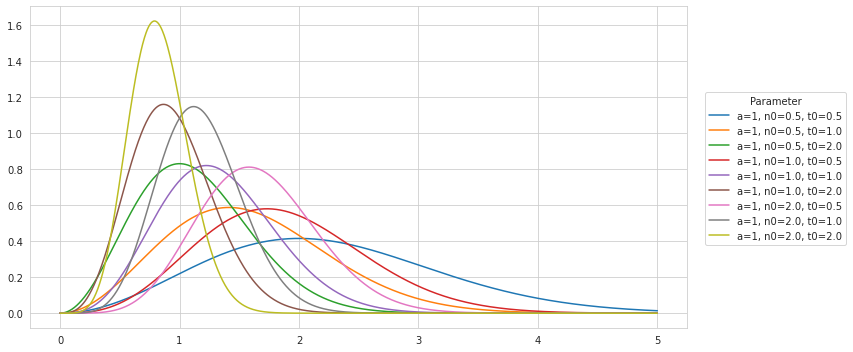

In [115]:
from itertools import product

a = 1
n0 = np.array([0.5, 1, 2])
t0 = np.array([0.5, 1, 2])

fig, ax = plt.subplots(figsize=(12, 5))
for n0_i, t0_i in product(n0, t0):
    label = f"a={a}, n0={n0_i}, t0={t0_i}"
    alpha = a * n0_i + 1
    beta = np.sqrt(n0_i * t0_i)
    thetas = np.linspace(0, 5, 1000)
    ax.plot(thetas, galenshore_density(thetas, alpha, beta), label=label)

ax.legend(title='Parameter', loc='best', bbox_to_anchor=(1.25, 0.75))
fig.tight_layout()
fig.show()

## Ex 2

In [179]:
a = 210
b = 11
n = 10
X = 200
thetas = np.linspace(1, 20, 10000)

In [180]:
variances_bayes = (n*thetas)/((n+1)**2)
bias_bayes = ((n*thetas + 10)/(n+1)) - thetas

variances_mle = thetas / n

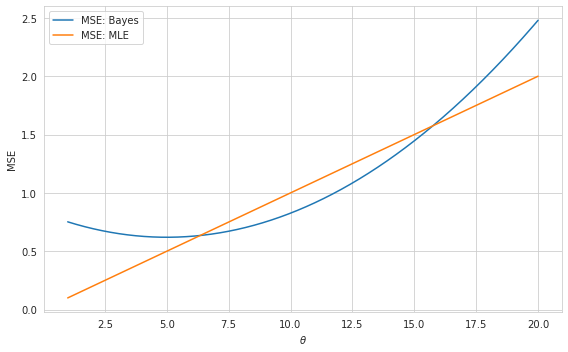

In [184]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(thetas, (bias_bayes)**2 + variances_bayes, label='MSE: Bayes')
ax.plot(thetas, variances_mle, label='MSE: MLE')

ax.set_xlabel('$\\theta$')
ax.set_ylabel('MSE')
ax.legend()
fig.tight_layout()
fig.show()